In [1]:
import pandas as pd
import numpy as np

#for visualisation
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
#import dataset
df = pd.read_csv("CarPrice.csv")

In [3]:
#look 5 first rows
pd.set_option("max_columns",None)
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
#memeriksa info data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

1.every columns in dataset have match with datatype <br>
2.dataset not have missing values <br>
3.price of car is target

In [5]:
#check duplicate
df[df.duplicated()]

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


dataset not have data duplicate

In [6]:
#statistic summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
car_ID,205.0,103.000000,59.322565,1.00,52.00,103.00,154.00,205.00
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
wheelbase,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
carlength,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
carwidth,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
carheight,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curbweight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
enginesize,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
boreratio,205.0,3.329756,0.270844,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.255415,0.313597,2.07,3.11,3.29,3.41,4.17


based on statistic: <br>
1.Price has right skew because mean > median, with minimum price is 5118 and maximum price 45400 (in USD) <br>
2.curbwieght, enginesize, and horse power have right skew <br>
3.car_id is unique, this columns will drop

In [7]:
df.describe(include="object")

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
count,205,205,205,205,205,205,205,205,205,205
unique,147,2,2,2,5,3,2,7,7,8
top,toyota corona,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,6,185,168,115,96,120,202,148,159,94


1.carname most sold is "toyota corona with frequensi is 6.<br>
2.fueltype most sold is gas with frequency is 185.<br>
3.aspiration most sold is std with frequency is 168. <br>
4.doornumber most sold is four with frequency is 115. <br>
5.carbody most sold is sedan with frequency is 96. <br>
6.drivewheel most sold is fwd with frequency is 120. <br>
7.enginelocation most sold is front with frequency is 202. <br>
8.enginetype most sold is ohc with frequency is 148. <br>
9.cylindernumber most sold is four with frequency is 159. <br>
10.fuelsystem most sold is mpfi with frequency is 94

In [8]:
#drop columns car id
df = df.drop("car_ID",axis=1)

# Eksplonatory Data Analysis

## Univariate Analysis

### Histogram

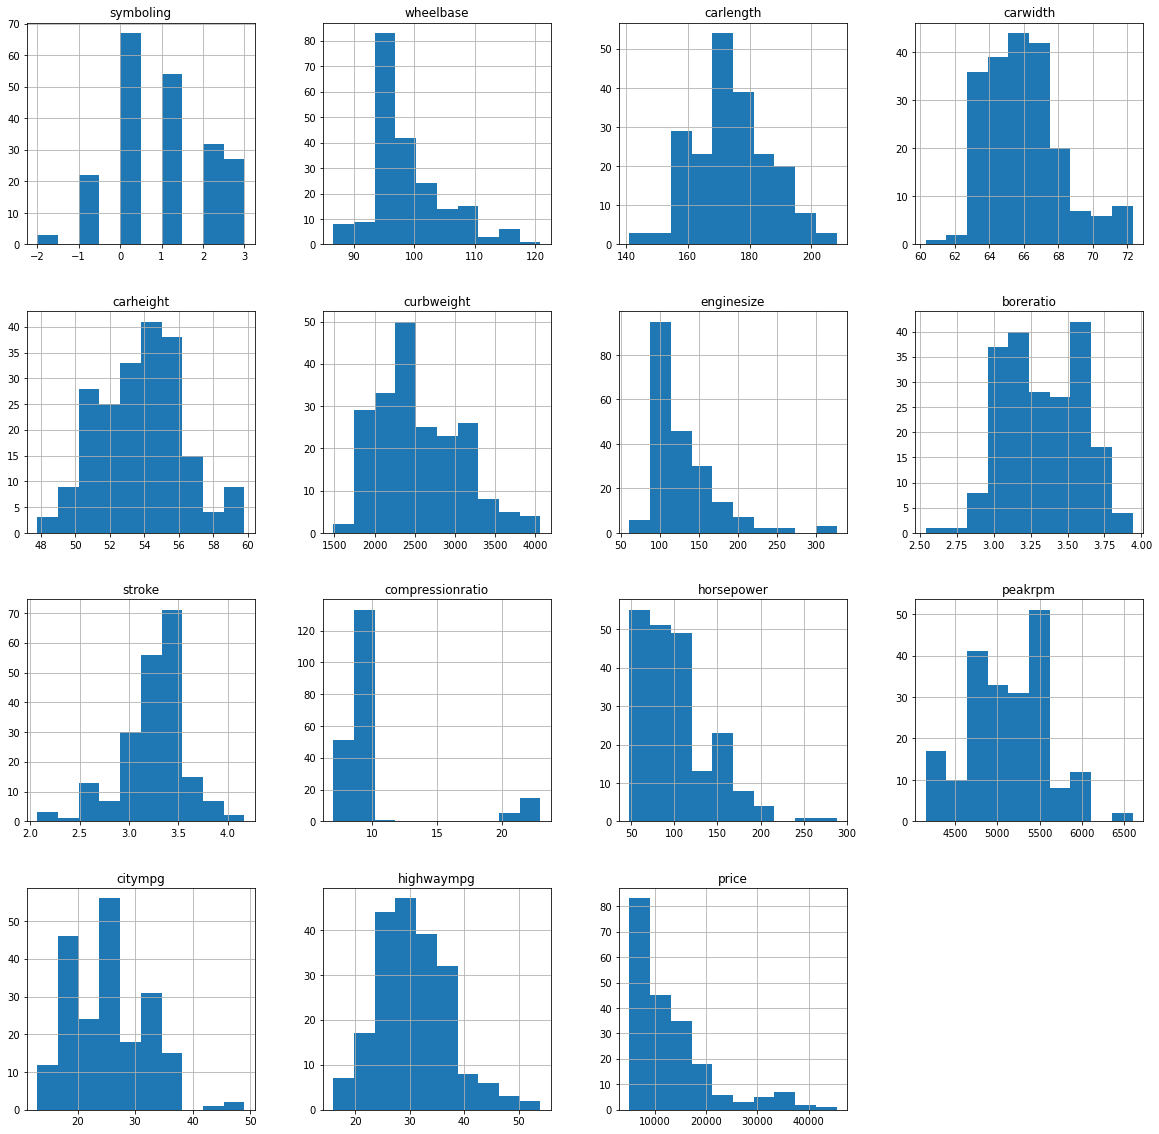

In [9]:
df.hist(bins=10,figsize=(20,20));

In [10]:
#separate numeric and categorical columns
num = df.select_dtypes(include=["int","float"]).columns
cat = df.select_dtypes("object").columns

print("columns numeric and float are {}".format(num.to_list()))
print("columns categorical are {}".format(cat.to_list()))

columns numeric and float are ['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']
columns categorical are ['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']


### boxplot
For numerical

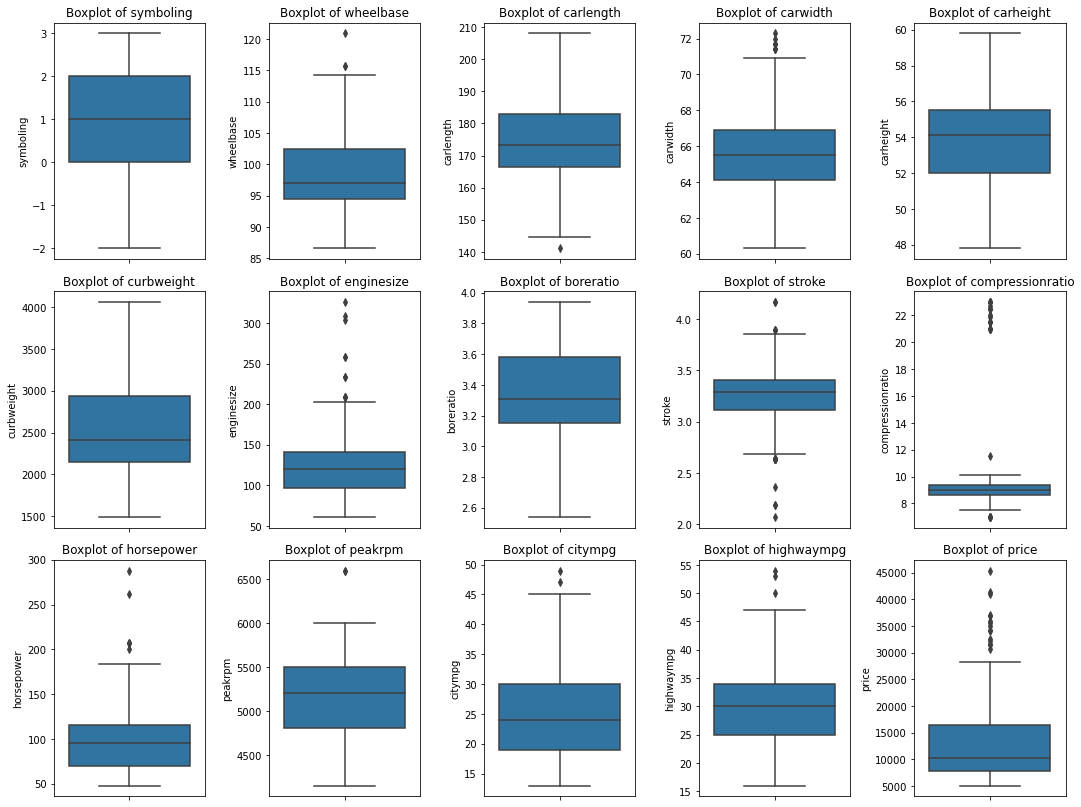

In [11]:
plt.figure(figsize=(15,15))

for i in range(0,len(num)) :
    plt.subplot(4,len(num)/3,i+1)
    sns.boxplot(data=df,y=df[num[i]])
    plt.title("Boxplot of {}".format(num[i]))
    plt.tight_layout()

<Figure size 720x576 with 0 Axes>

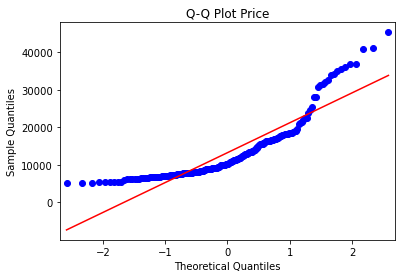

In [12]:
#uji normalitas pada price
import statsmodels
import statsmodels.api as sm

plt.figure(figsize=(10,8))
sm.graphics.qqplot(df["price"],line="s")
plt.title("Q-Q Plot Price");

from grpahics histogram, pric have right skewness and from boxplot price has many outliers. <br>
based on Q-Q plot price not follow red line so this indicated price column not follow normal distribution

In [13]:
#normal distribution test
from scipy.stats import shapiro
stat_y,pval_y = shapiro(df["price"])

if pval_y <0.05:
    print("price follows not normal distribution because pvalue price is {}".format(pval_y))
else:
    print("price follows normal distribution because pvalue price is {}".format(pval_y))

price follows not normal distribution because pvalue price is 1.8491777441833604e-15


outliers will maintaince because the dataset dimension too small, and model predicting will using robust with outliers

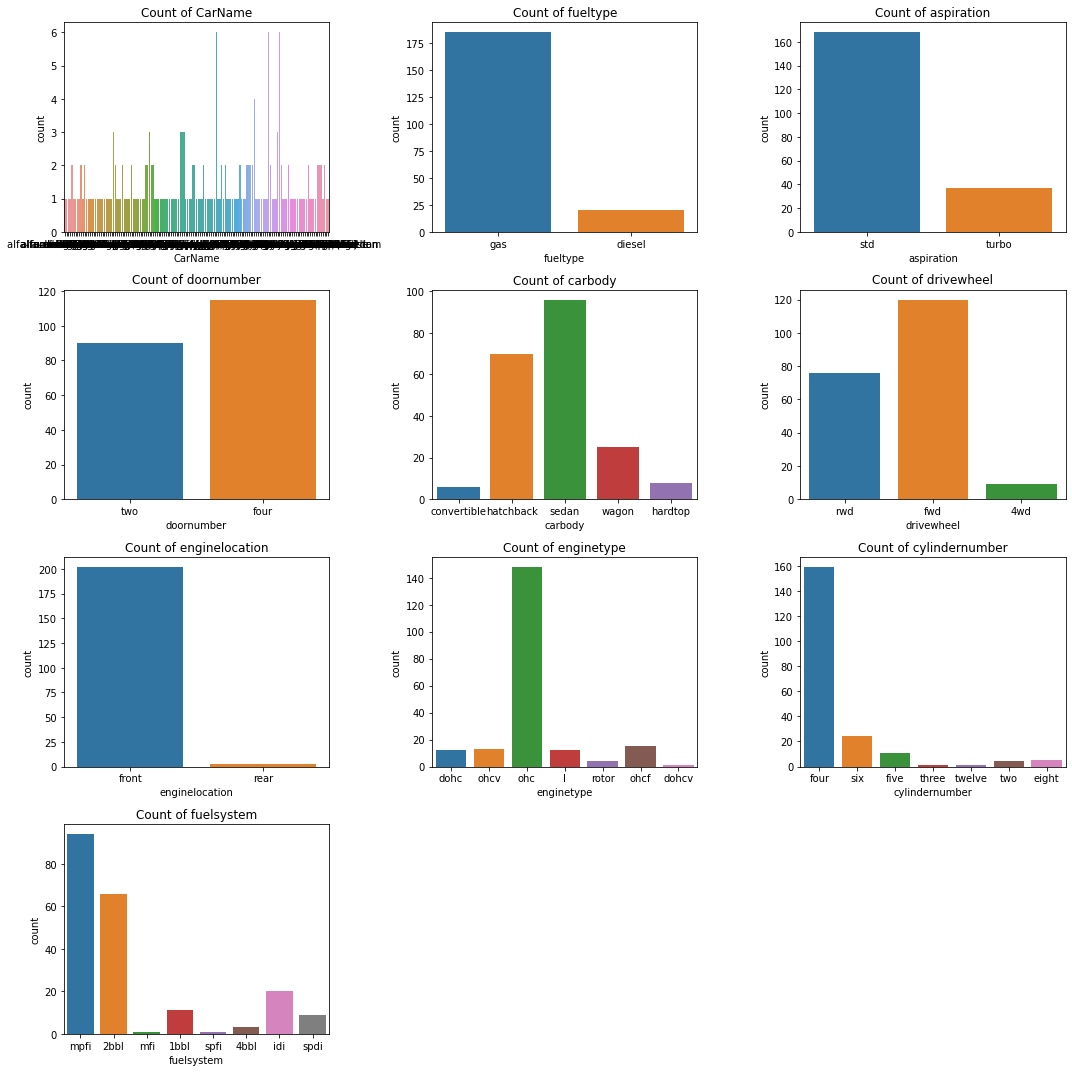

In [14]:
plt.rcParams["figure.figsize"] = (15,15)

for i in range(0,len(cat)) :
    plt.subplot(4,len(cat)/3,i+1)
    sns.countplot(data=df,x=df[cat[i]])
    plt.title("Count of {}".format(cat[i]))
    plt.tight_layout()

some columns have unequal values, such as the fueltype column which is dominated by gas, the aspiration column which is dominated by std, the enginetype column is dominated by ohc, the enginelocation column is dominated by front, and the cylinder number is dominated by four. <br>

Insight :
1.most people are interested to buy a car with a fuel type is gas.<br>
2.most people are interested to buy a car with standard aspiration then turbo.<br>
3.hatchback and sedan are very popular bought by the customer.<br>
4.engine location front is most popular bought by the customer. <br>
5.engine type most popular bought by the customer.<br>
6.the car which has four-cylinder number is very popular bought by the customer <br>
7.fuel type of mpfi and 2bbl are very popular bought by the customer<br>

In [15]:
#extract company from car name
product = []
for i in df["CarName"]:
    product.append(i.split(" ")[0])

df["Company"] = product

#replace Nissan to nissan
df["Company"] = df["Company"].replace(["maxda","toyouta","vokswagen","vw","porcshce","Nissan"],["mazda","toyota","volkswagen",
                                                                                          "volkswagen","porsche","nissan"])
#check value
df["Company"].value_counts()

toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
volkswagen     12
subaru         12
peugeot        11
volvo          11
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
jaguar          3
chevrolet       3
alfa-romero     3
renault         2
mercury         1
Name: Company, dtype: int64

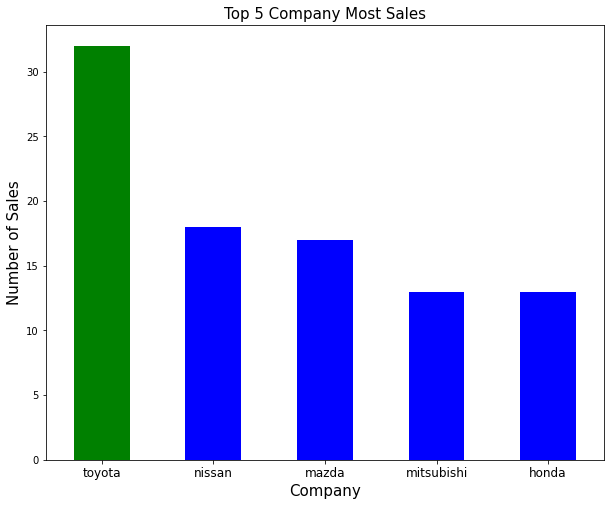

In [16]:
#loook top 5 company most sales
plt.rcParams["figure.figsize"] = (10,8)
ax = df["Company"].value_counts().iloc[:5].plot(kind="bar",color=["g","b","b","b","b"])
ax.set_title("Top 5 Company Most Sales",fontsize=15)
ax.set_xlabel("Company",fontsize=15)
ax.set_ylabel("Number of Sales",fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, fontsize=12);

From the top 5 company cars, Toyota has the highest sales.

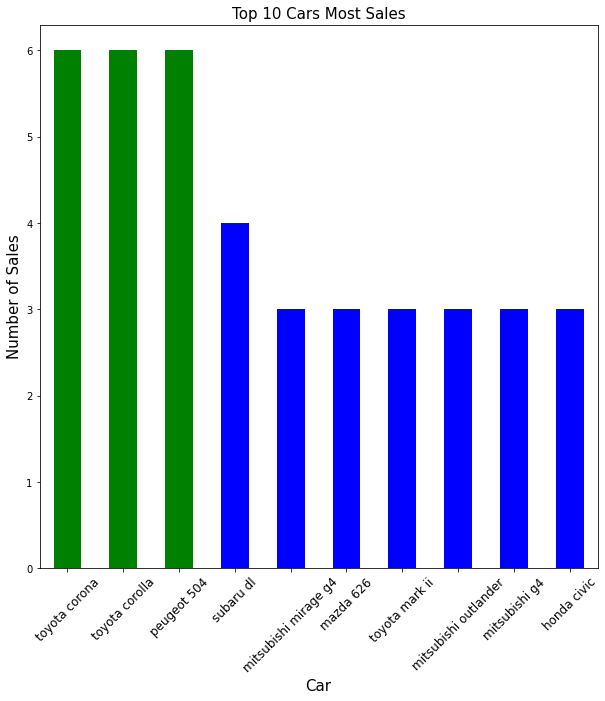

In [17]:
#top 10 car most sales
plt.figure(figsize=(10,10))
ax = df["CarName"].value_counts().iloc[:10].plot(kind="bar",color=["g","g","g","b","b","b","b","b","b","b"])
ax.set_title("Top 10 Cars Most Sales",fontsize=15)
ax.set_xlabel("Car",fontsize=15)
ax.set_ylabel("Number of Sales",fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize=12);

Of the 10 types of cars that were sold the most, the toyota corona, toyota carolla and peugeot 504 were the types of cars that were sold the most with a total of 6 cars sold.

## Bivariate Analysis

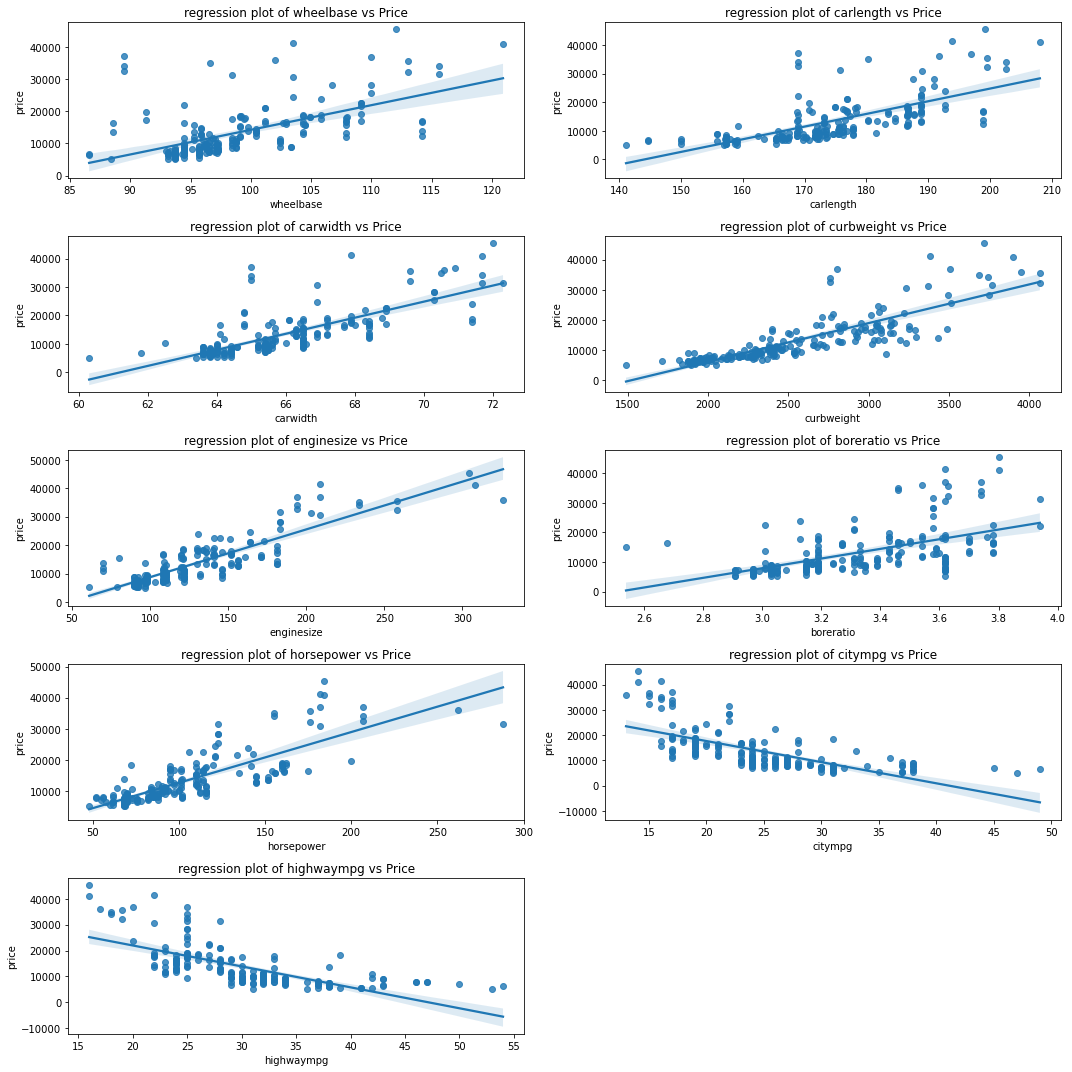

In [18]:
predictor = ['wheelbase', 'carlength', 'carwidth','curbweight',
             'enginesize', 'boreratio','horsepower','citympg', 'highwaympg']
#scatterplot
plt.figure(figsize = (15,15))
for i in range(0,len(predictor)) :
    plt.subplot(5,len(predictor)/4,i+1)
    sns.regplot(data=df,x=df[predictor[i]],y=df["price"])
    plt.title("regression plot of {} vs Price".format(predictor[i]))
    plt.tight_layout();
    

Insight :
wheelbase, car length, car width, curb weight, engine size, bore ratio, horse power have a positive correlation with price, while ,city mpg and highway mpg have a negative correlation with price


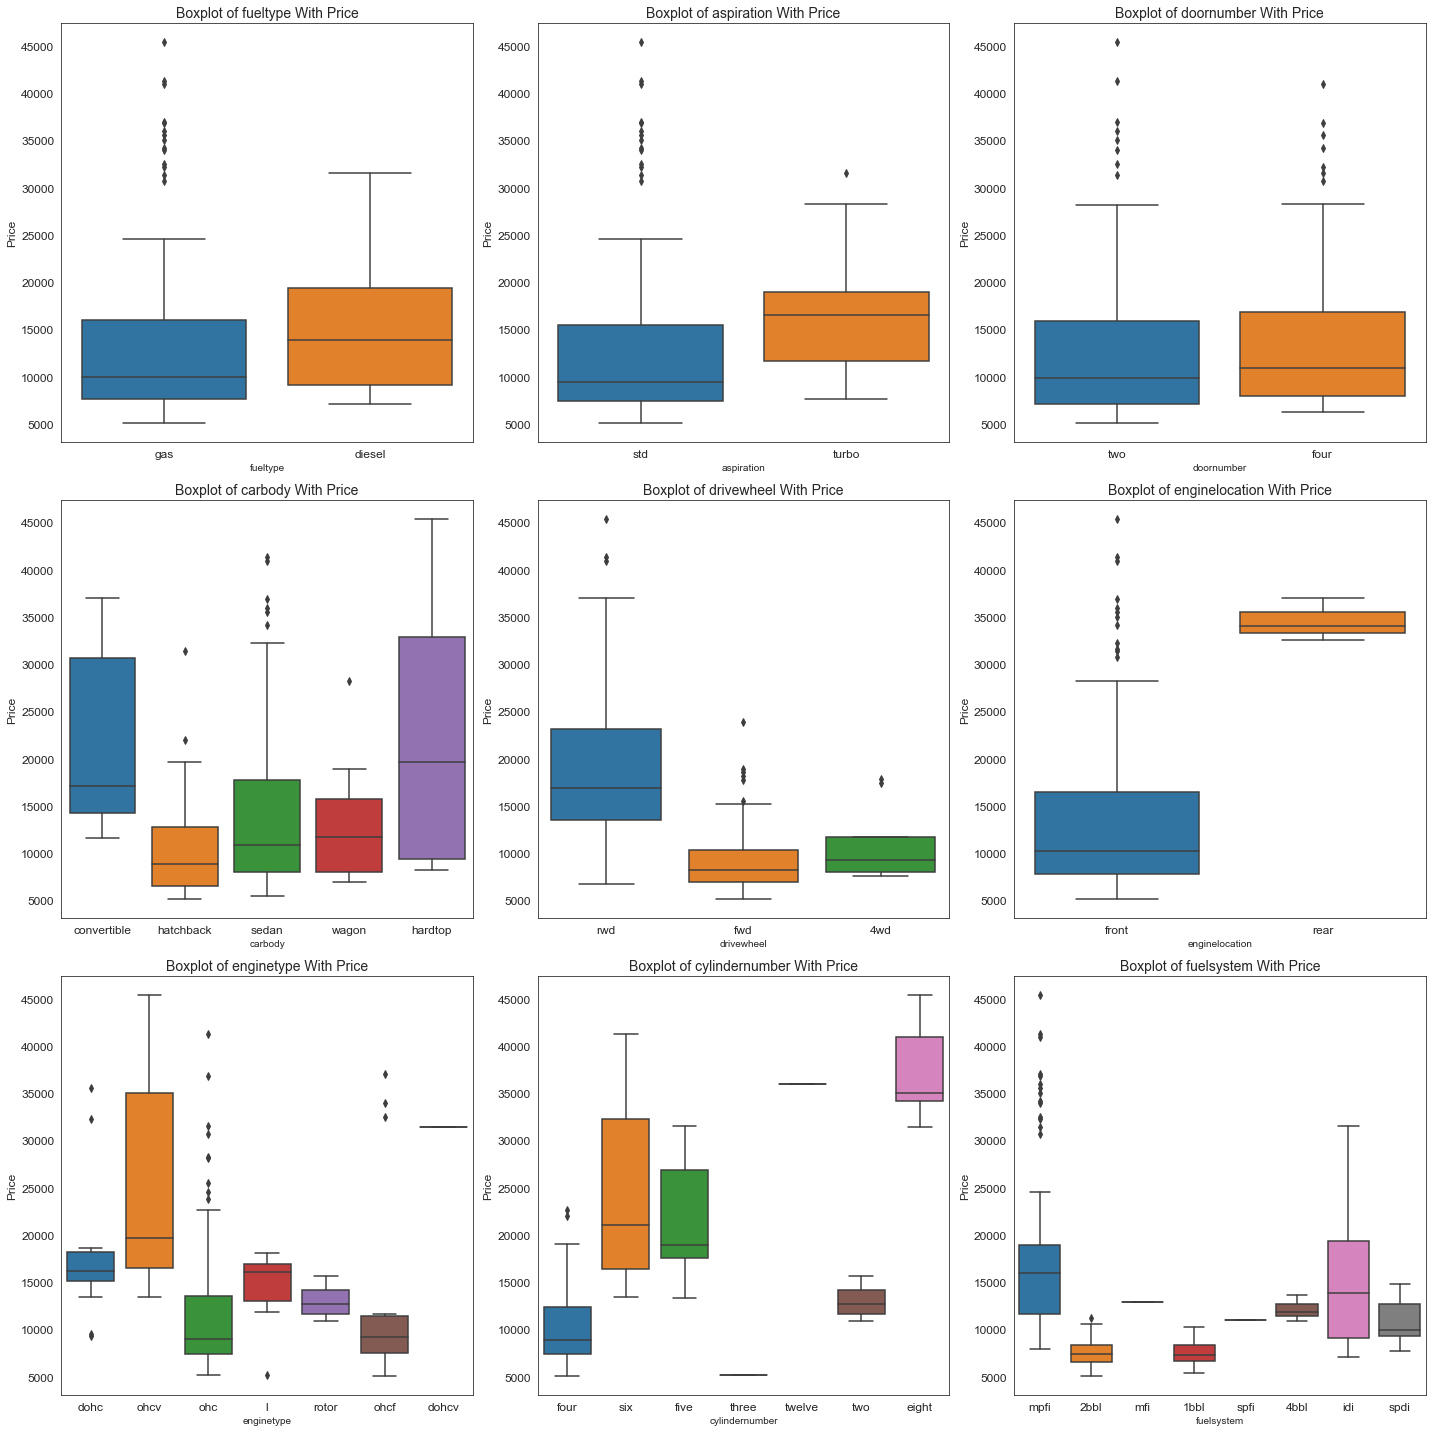

In [19]:
cat = ['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
       'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']

plt.figure(figsize=(20,20))
sns.set_style("white")
for i in range(0,len(cat)) :
    plt.subplot(3,len(cat)/3,i+1)
    sns.boxplot(data=df,x=df[cat[i]],y=df["price"])
    plt.title("Boxplot of {} With Price".format(cat[i]),fontsize=14)
    plt.xlabel("{}".format(cat[i]))
    plt.xticks(fontsize=12)
    plt.ylabel("Price",fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()

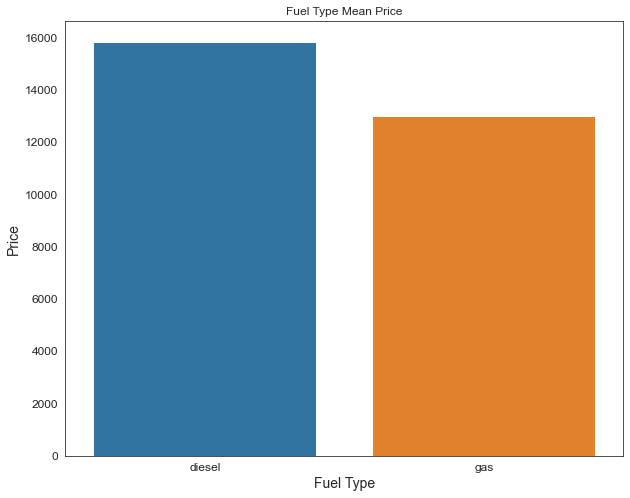

In [20]:
fuel_mean = df.groupby("fueltype",as_index=False)["price"].agg("mean")

plt.figure(figsize=(10,8))
sns.barplot(data=fuel_mean,x="fueltype",y="price")
plt.title("Fuel Type Mean Price")
plt.xlabel("Fuel Type",fontsize=14)
plt.xticks(rotation=0,fontsize=12)
plt.ylabel("Price",fontsize=14)
plt.yticks(fontsize=12);

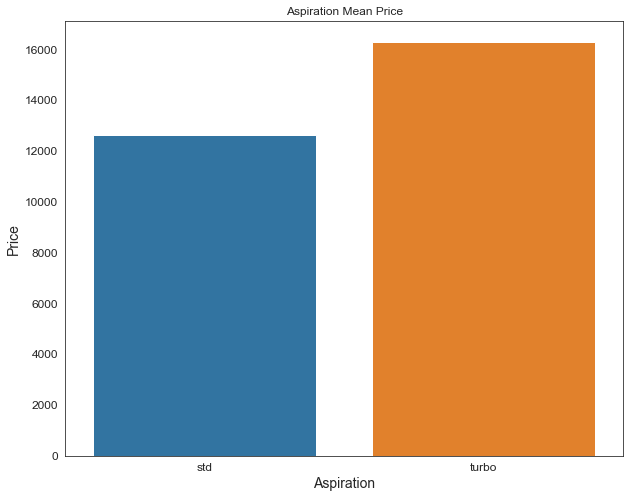

In [21]:
aspiration_mean = df.groupby("aspiration",as_index=False)["price"].agg("mean")

plt.figure(figsize=(10,8))
sns.barplot(data=aspiration_mean,x="aspiration",y="price")
plt.title("Aspiration Mean Price")
plt.xlabel("Aspiration",fontsize=14)
plt.xticks(rotation=0,fontsize=12)
plt.ylabel("Price",fontsize=14)
plt.yticks(fontsize=12);

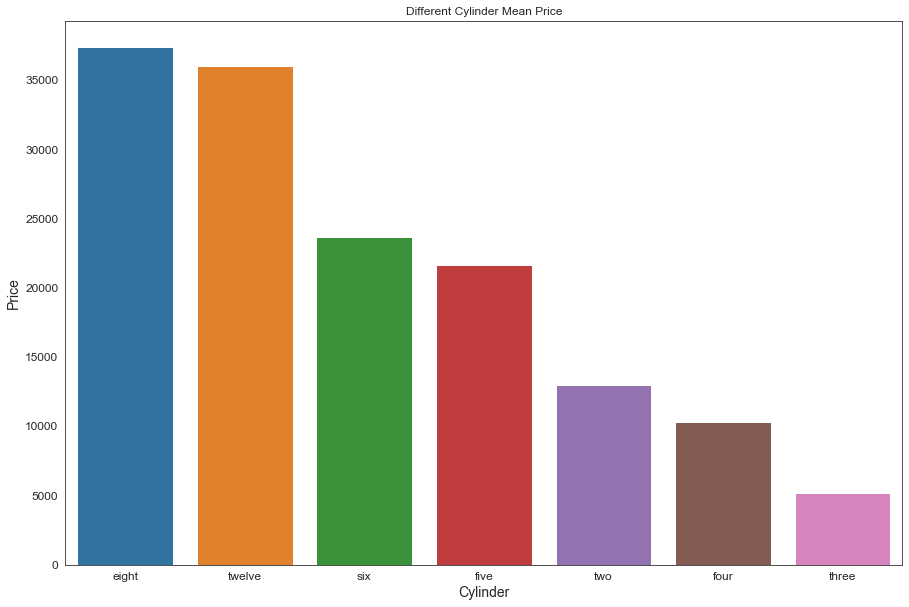

In [22]:
cylinder_mean = df.groupby("cylindernumber",as_index=False)["price"].mean().sort_values("price",ascending=False)

plt.figure(figsize=(15,10))
sns.barplot(data=cylinder_mean,x="cylindernumber",y="price")
plt.title("Different Cylinder Mean Price")
plt.xlabel("Cylinder",fontsize=14)
plt.xticks(rotation=0,fontsize=12)
plt.ylabel("Price",fontsize=14)
plt.yticks(fontsize=12);

car with six cylinder have highest mean price the the others followed by twelve cylinder

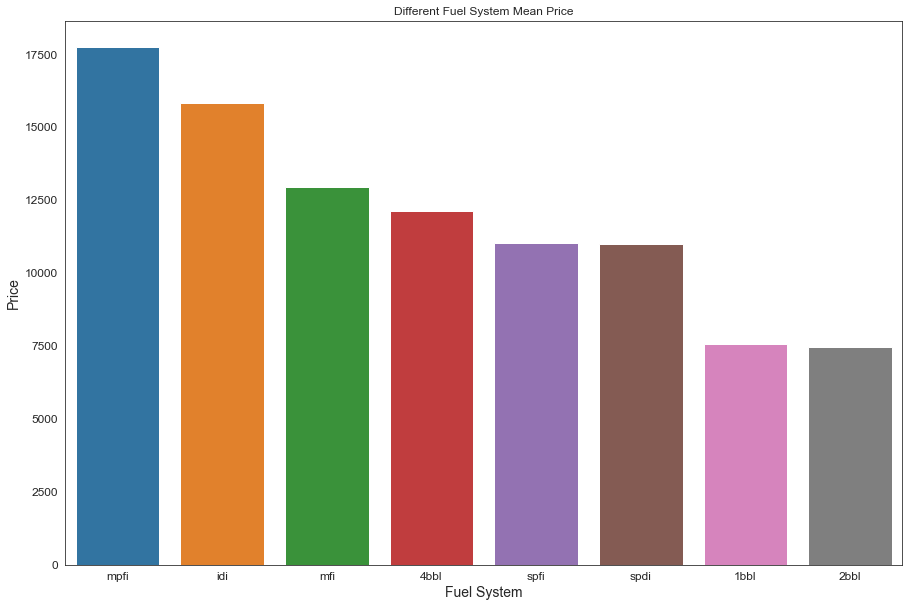

In [23]:
fuelsystem_mean = df.groupby("fuelsystem",as_index=False)["price"].mean().sort_values("price",ascending=False)

plt.figure(figsize=(15,10))
sns.barplot(data=fuelsystem_mean,x="fuelsystem",y="price")
plt.title("Different Fuel System Mean Price")
plt.xlabel("Fuel System",fontsize=14)
plt.xticks(rotation=0,fontsize=12)
plt.ylabel("Price",fontsize=14)
plt.yticks(fontsize=12);

mpfi is the highest mean price than the others fuel system

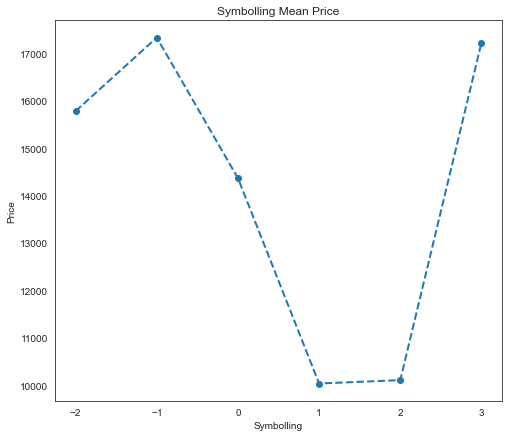

In [24]:
ax = df.groupby("symboling")["price"].mean().plot(linewidth=2,figsize=(8,7),linestyle="--",marker='o')
ax.set_title("Symbolling Mean Price")
ax.set_xlabel("Symbolling")
ax.set_ylabel("Price");

Insight :
When car have low risk assurance the price will increase and will decrease when the risk assurance increase. but in range risk 2 to 3 the price significantly increase.


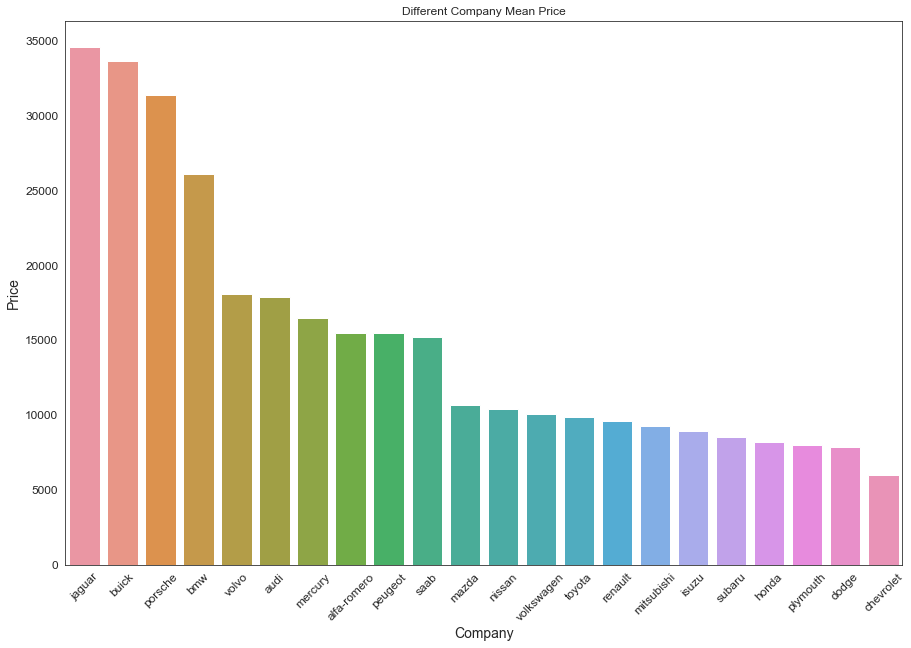

In [25]:
company_price = df.groupby("Company",as_index=False)["price"].mean().sort_values("price",ascending=False)

plt.figure(figsize=(15,10))
sns.barplot(data=company_price,x="Company",y="price")
plt.title("Different Company Mean Price")
plt.xlabel("Company",fontsize=14)
plt.xticks(rotation=45,fontsize=12)
plt.ylabel("Price",fontsize=14)
plt.yticks(fontsize=12);

based on the risk level, when the risk level is high the price will decrease, but when the risk level is in the range 2 to 3, the price will increase

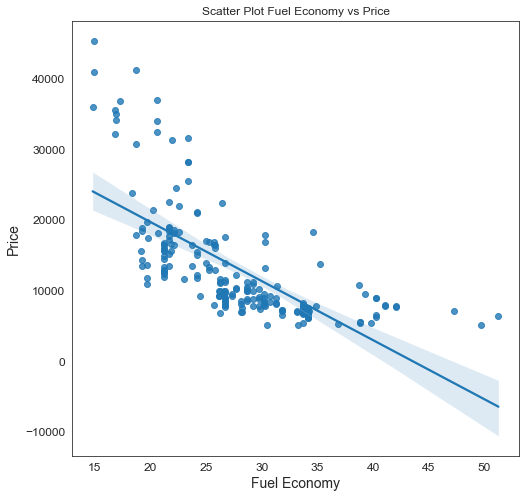

In [26]:
# Feature Engineering
#Fuel economy
df['fueleconomy'] = (0.55 * df['citympg']) + (0.45 * df['highwaympg'])

#scatterplot fuel economy vs price
plt.figure(figsize=(8,8))
sns.regplot(data=df,x="fueleconomy",y="price")
plt.title("Scatter Plot Fuel Economy vs Price")
plt.xlabel("Fuel Economy",fontsize=14)
plt.xticks(rotation=0,fontsize=12)
plt.ylabel("Price",fontsize=14)
plt.yticks(fontsize=12);

fuel economy seem have negative correlation with price, when fuel economy increase, the price will decrease

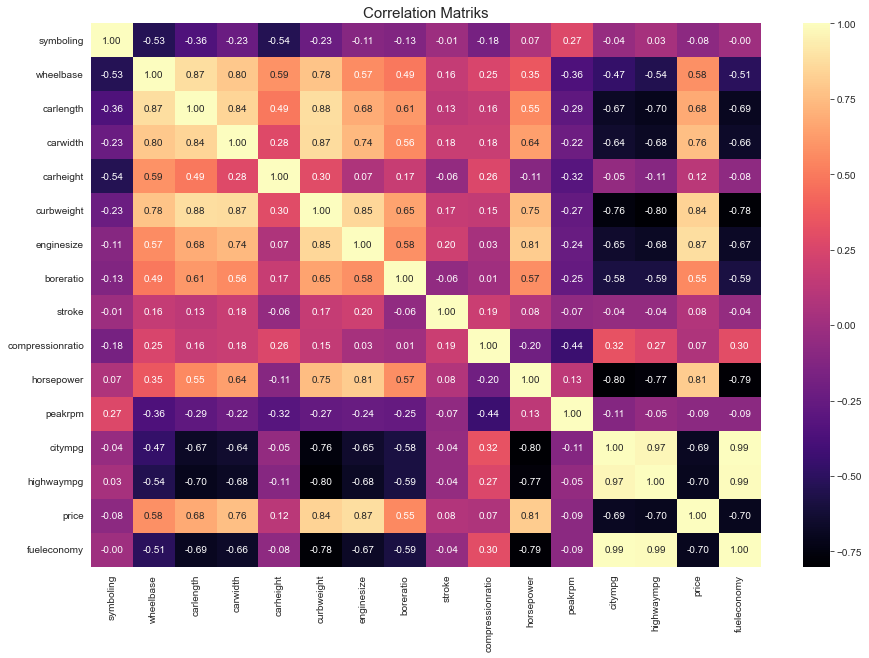

In [27]:
#numerical correlation with price
#feature exclude if feature correlation with price < |0.5|
plt.figure(figsize = (15,10))

sns.heatmap(df.corr(),annot=True,fmt='.2f',cmap="magma")
plt.title("Correlation Matriks",fontsize=15);

based on correlation matriks, we get some feature that can be good predictor namely : <br>
1.highwaympg,citympg,horsepower,boreratio,enginesize,curbweight,carwidht,carlength,fuel economy and wheelbase. <br>


basad on correaltion matrix to much feature have multicolinearity

In [28]:
df.columns.values

array(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio',
       'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg', 'price', 'Company', 'fueleconomy'], dtype=object)

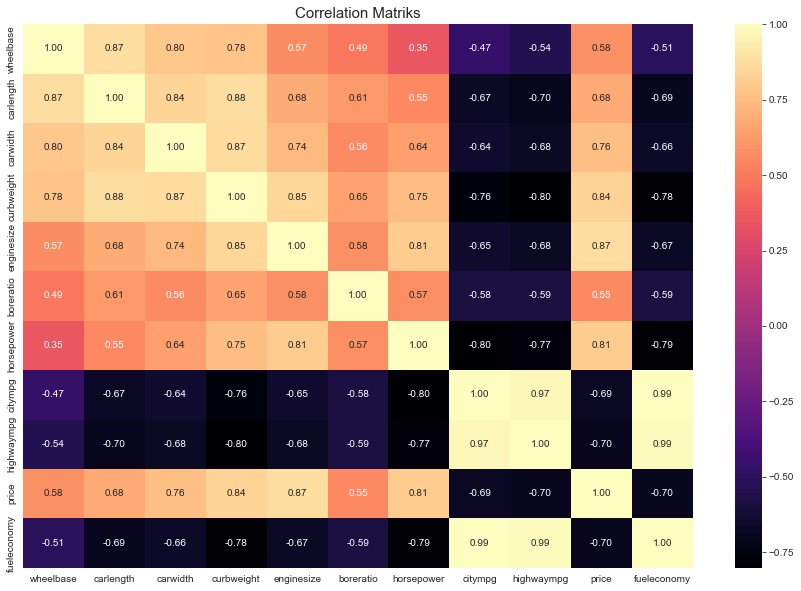

In [29]:
num = ['CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth','curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio',
       'horsepower','citympg','highwaympg', 'price', 'Company', 'fueleconomy']

#heatmap

plt.figure(figsize = (15,10))

sns.heatmap(df[num].corr(),annot=True,fmt='.2f',cmap="magma")
plt.title("Correlation Matriks",fontsize=15);

In [30]:
df[num].corr()['price']

wheelbase      0.577816
carlength      0.682920
carwidth       0.759325
curbweight     0.835305
enginesize     0.874145
boreratio      0.553173
horsepower     0.808139
citympg       -0.685751
highwaympg    -0.697599
price          1.000000
fueleconomy   -0.696213
Name: price, dtype: float64

''

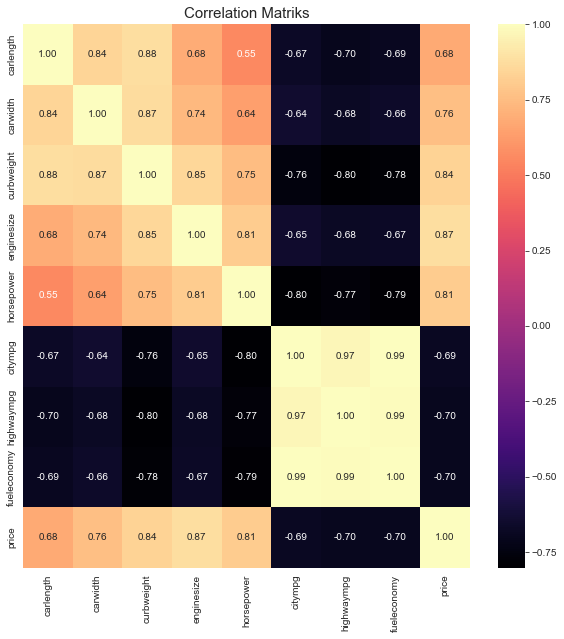

In [58]:
num = ['carlength','carwidth','curbweight','enginesize','horsepower','citympg','highwaympg','fueleconomy','price']
plt.figure(figsize = (10,10))

sns.heatmap(df[num].corr(),annot=True,fmt='.2f',cmap="magma")
plt.title("Correlation Matriks",fontsize=15)
;

the predictor chooses are fuel economy, engine size, and curbweight because have high correlation with price

In [32]:
num_final = ['fueleconomy','enginesize','curbweight','price']

In [34]:
#categorical correlation with price
cat = df.select_dtypes(include='object')
cat = pd.get_dummies(cat, drop_first = True)
cat_corr = pd.concat([cat,df["price"]],axis=1)
cat_corr.head()

,CarName_alfa-romero Quadrifoglio,CarName_alfa-romero giulia,CarName_alfa-romero stelvio,CarName_audi 100 ls,CarName_audi 100ls,CarName_audi 4000,CarName_audi 5000,CarName_audi 5000s (diesel),CarName_audi fox,CarName_bmw 320i,CarName_bmw x1,CarName_bmw x3,CarName_bmw x4,CarName_bmw x5,CarName_bmw z4,CarName_buick century,CarName_buick century luxus (sw),CarName_buick century special,CarName_buick electra 225 custom,CarName_buick opel isuzu deluxe,CarName_buick regal sport coupe (turbo),CarName_buick skyhawk,CarName_buick skylark,CarName_chevrolet impala,CarName_chevrolet monte carlo,CarName_chevrolet vega 2300,CarName_dodge challenger se,CarName_dodge colt (sw),CarName_dodge colt hardtop,CarName_dodge coronet custom,CarName_dodge coronet custom (sw),CarName_dodge d200,CarName_dodge dart custom,CarName_dodge monaco (sw),CarName_dodge rampage,CarName_honda accord,CarName_honda accord cvcc,CarName_honda accord lx,CarName_honda civic,CarName_honda civic (auto),CarName_honda civic 1300,CarName_honda civic 1500 gl,CarName_honda civic cvcc,CarName_honda prelude,CarName_isuzu D-Max,CarName_isuzu D-Max V-Cross,CarName_isuzu MU-X,CarName_jaguar xf,CarName_jaguar xj,CarName_jaguar xk,CarName_maxda glc deluxe,CarName_maxda rx3,CarName_mazda 626,CarName_mazda glc,CarName_mazda glc 4,CarName_mazda glc custom,CarName_mazda glc custom l,CarName_mazda glc deluxe,CarName_mazda rx-4,CarName_mazda rx-7 gs,CarName_mazda rx2 coupe,CarName_mercury cougar,CarName_mitsubishi g4,CarName_mitsubishi lancer,CarName_mitsubishi mirage,CarName_mitsubishi mirage g4,CarName_mitsubishi montero,CarName_mitsubishi outlander,CarName_mitsubishi pajero,CarName_nissan clipper,CarName_nissan dayz,CarName_nissan fuga,CarName_nissan gt-r,CarName_nissan juke,CarName_nissan kicks,CarName_nissan latio,CarName_nissan leaf,CarName_nissan note,CarName_nissan nv200,CarName_nissan otti,CarName_nissan rogue,CarName_nissan teana,CarName_nissan titan,CarName_peugeot 304,CarName_peugeot 504,CarName_peugeot 504 (sw),CarName_peugeot 505s turbo diesel,CarName_peugeot 604sl,CarName_plymouth cricket,CarName_plymouth duster,CarName_plymouth fury gran sedan,CarName_plymouth fury iii,CarName_plymouth satellite custom (sw),CarName_plymouth valiant,CarName_porcshce panamera,CarName_porsche boxter,CarName_porsche cayenne,CarName_porsche macan,CarName_renault 12tl,CarName_renault 5 gtl,CarName_saab 99e,CarName_saab 99gle,CarName_saab 99le,CarName_subaru,CarName_subaru baja,CarName_subaru brz,CarName_subaru dl,CarName_subaru r1,CarName_subaru r2,CarName_subaru trezia,CarName_subaru tribeca,CarName_toyota carina,CarName_toyota celica gt,CarName_toyota celica gt liftback,CarName_toyota corolla,CarName_toyota corolla 1200,CarName_toyota corolla 1600 (sw),CarName_toyota corolla liftback,CarName_toyota corolla tercel,CarName_toyota corona,CarName_toyota corona hardtop,CarName_toyota corona liftback,CarName_toyota corona mark ii,CarName_toyota cressida,CarName_toyota mark ii,CarName_toyota starlet,CarName_toyota tercel,CarName_toyouta tercel,CarName_vokswagen rabbit,CarName_volkswagen 1131 deluxe sedan,CarName_volkswagen 411 (sw),CarName_volkswagen dasher,CarName_volkswagen model 111,CarName_volkswagen rabbit,CarName_volkswagen rabbit custom,CarName_volkswagen super beetle,CarName_volkswagen type 3,CarName_volvo 144ea,CarName_volvo 145e (sw),CarName_volvo 244dl,CarName_volvo 245,CarName_volvo 246,CarName_volvo 264gl,CarName_volvo diesel,CarName_vw dasher,CarName_vw rabbit,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,Company_audi,Company_bmw,Company_buick,Company_chevrolet

<AxesSubplot:>

<Figure size 1080x720 with 0 Axes>

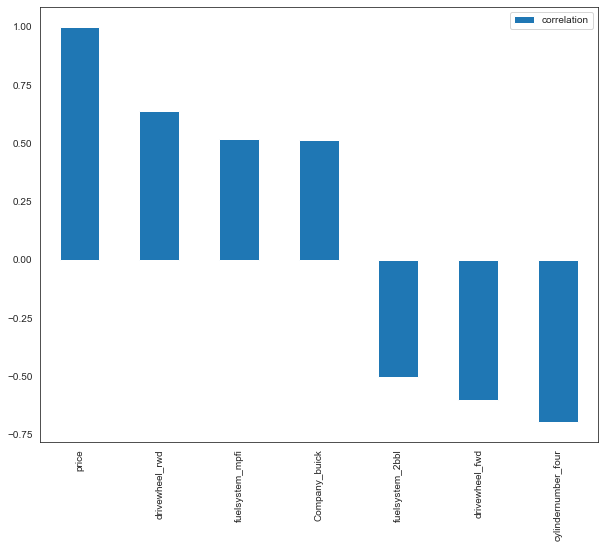

In [35]:
corr = pd.DataFrame(cat_corr.corr()["price"]).rename(columns=({'price':'correlation'
                                                       })).sort_values("correlation",ascending=False)

corr = corr[(corr["correlation"]<=-0.5) | (corr['correlation']>=0.5)]

#visualisation
plt.figure(figsize=(15,10))
corr.plot(kind="bar")

In [36]:
cat = cat[['drivewheel_rwd','fuelsystem_mpfi','Company_buick','fuelsystem_2bbl','drivewheel_fwd','cylindernumber_four']]
cat

,drivewheel_rwd,fuelsystem_mpfi,Company_buick,fuelsystem_2bbl,drivewheel_fwd,cylindernumber_four
0,1,1,0,0,0,1
1,1,1,0,0,0,1
2,1,1,0,0,0,0
3,0,1,0,0,1,1
4,0,1,0,0,0,0
...,...,...,...,...,...,...
200,1,1,0,0,0,1
201,1,1,0,0,0,1
202,1,1,0,0,0,0
203,1,0,0,0,0,0


In [37]:
data = pd.concat([df[num_final],cat],axis=1)

In [38]:
data

,fueleconomy,enginesize,curbweight,price,drivewheel_rwd,fuelsystem_mpfi,Company_buick,fuelsystem_2bbl,drivewheel_fwd,cylindernumber_four
0,23.70,130,2548,13495.0,1,1,0,0,0,1
1,23.70,130,2548,16500.0,1,1,0,0,0,1
2,22.15,152,2823,16500.0,1,1,0,0,0,0
3,26.70,109,2337,13950.0,0,1,0,0,1,1
4,19.80,136,2824,17450.0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
200,25.25,141,2952,16845.0,1,1,0,0,0,1
201,21.70,141,3049,19045.0,1,1,0,0,0,1
202,20.25,173,3012,21485.0,1,1,0,0,0,0
203,26.45,145,3217,22470.0,1,0,0,0,0,0


In [39]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [40]:
num_vars = ["fueleconomy","enginesize","curbweight","price"]
data[num_vars] = scaler.fit_transform(data[num_vars])
data

,fueleconomy,enginesize,curbweight,price,drivewheel_rwd,fuelsystem_mpfi,Company_buick,fuelsystem_2bbl,drivewheel_fwd,cylindernumber_four
0,0.244170,0.260377,0.411171,0.207959,1,1,0,0,0,1
1,0.244170,0.260377,0.411171,0.282558,1,1,0,0,0,1
2,0.201646,0.343396,0.517843,0.282558,1,1,0,0,0,0
3,0.326475,0.181132,0.329325,0.219254,0,1,0,0,1,1
4,0.137174,0.283019,0.518231,0.306142,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
200,0.286694,0.301887,0.567882,0.291123,1,1,0,0,0,1
201,0.189300,0.301887,0.605508,0.345738,1,1,0,0,0,1
202,0.149520,0.422642,0.591156,0.406311,1,1,0,0,0,0
203,0.319616,0.316981,0.670675,0.430763,1,0,0,0,0,0


In [41]:
X = data.drop("price",axis=1)
y = data["price"]

In [42]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
X_train,X_test,y_train,y_test = train_test_split(X,y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [43]:
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [44]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(143, 9)
(62, 9)
(143,)
(62,)


In [45]:
def build_model(X,y):
    X = sm.add_constant(X) # Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary())    # model summary
    return lm


In [46]:
model1 = build_model(X_train, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     83.71
Date:                Fri, 28 Jan 2022   Prob (F-statistic):           2.20e-50
Time:                        00:17:53   Log-Likelihood:                 167.86
No. Observations:                 143   AIC:                            -315.7
Df Residuals:                     133   BIC:                            -286.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0369      0.057      0.648      0.5

In [47]:
y_train_pred = model1.predict(sm.add_constant(X_train))

In [48]:
# Making predictions
y_pred = model1.predict(sm.add_constant(X_test))

In [49]:
from sklearn.metrics import r2_score 
print("Test Prediction R-Sqrd: ", r2_score(y_test, y_pred))

Test Prediction R-Sqrd:  0.8306766235974858


In [50]:
print("Train Prediction R-Sqrd: ", r2_score(y_train, y_train_pred))

Train Prediction R-Sqrd:  0.8499485510414894


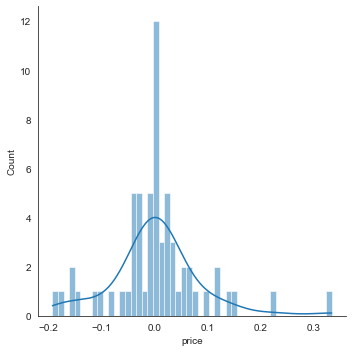

In [51]:
sns.displot(y_test-y_pred,bins = 50,kde = True)
plt.show()

<Figure size 720x576 with 0 Axes>

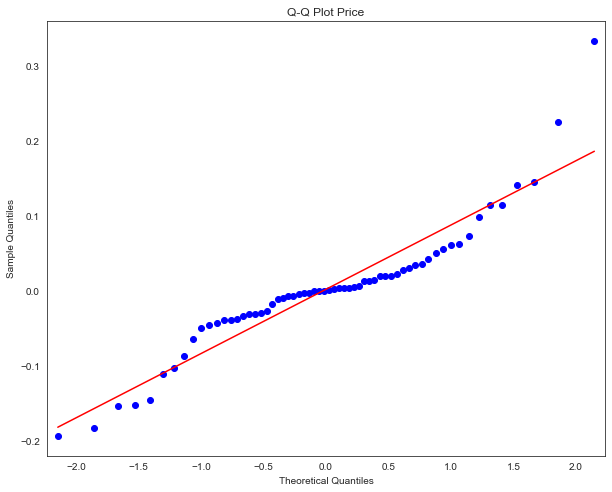

In [52]:
plt.figure(figsize=(10,8))
sm.graphics.qqplot(y_test-y_pred,line="s")
plt.title("Q-Q Plot Price");

From the residual distribution test, it can be seen that the residual distribution follows the bell curve and the test results displayed by the QQ plot, the blue dots follow the red line so it can be said that the residuals have a normal distribution and the regression model that is made is quite well used.


# Random Forest

In [53]:
from sklearn.ensemble import RandomForestRegressor
model2 = RandomForestRegressor()
model2.fit(X_train, y_train)

y_pred2 = model2.predict(X_test)

# lets check the Model accuracy
from sklearn.metrics import r2_score, mean_squared_error

mse = mean_squared_error(y_test, y_pred2)
rmse = np.sqrt(mse)
print("RMSE Score :", rmse)

r2_score = r2_score(y_test, y_pred2)
print("R2 Score :",r2_score)

RMSE Score : 0.061626317191878034
R2 Score : 0.912001360622083


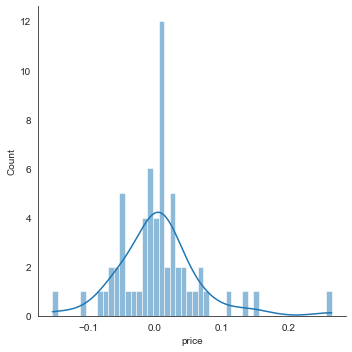

In [54]:
sns.displot(y_test-y_pred2,bins = 50,kde = True)
plt.show()

<Figure size 576x576 with 0 Axes>

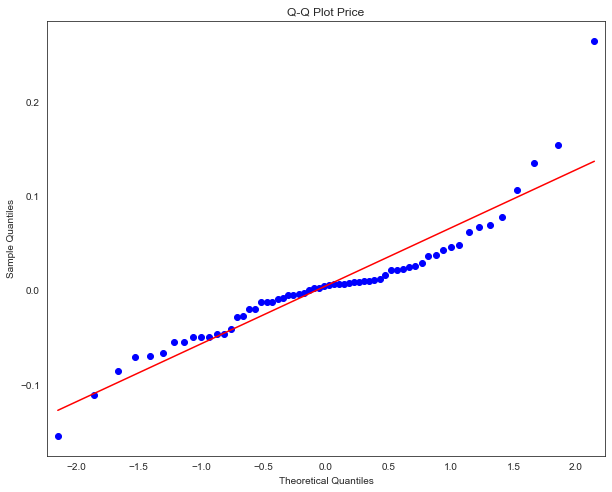

In [59]:
plt.figure(figsize=(8,8))
sm.graphics.qqplot(y_test-y_pred2,line="s")
plt.title("Q-Q Plot Price");

the model built with random forest has better results, namely the R square generated by 90% and the RMSE score close to 0 and also based on the residual distribution which can be said to follow a normal distribution, so the random forest model can be used and is better than linear regression model.
